In [41]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

def gau(m,s,x):
    res =(1/math.sqrt(2*np.pi*s**2))*np.exp(-(x-m)**2/(2*s**2))
    return(res)

def gkde(data,h,x):
    n = len(data)
    res_vec = np.zeros(n)
    for k in range(n):
        res_vec[k] = gau(0,1,(x-data[k])/h)
    res = 1/(n*h)*res_vec@np.ones(n)
    return(res)

def nw(datax, datay,h,x):
    n = len(datax)
    res_vec = np.zeros(n)
    for k in range(n):
        res_vec[k] = gau(0,1, (x-datax[k])/h)
    nrm=res_vec@np.ones(n)
    res = 1/nrm*res_vec@datay
    return(res)


## Solution 1.1

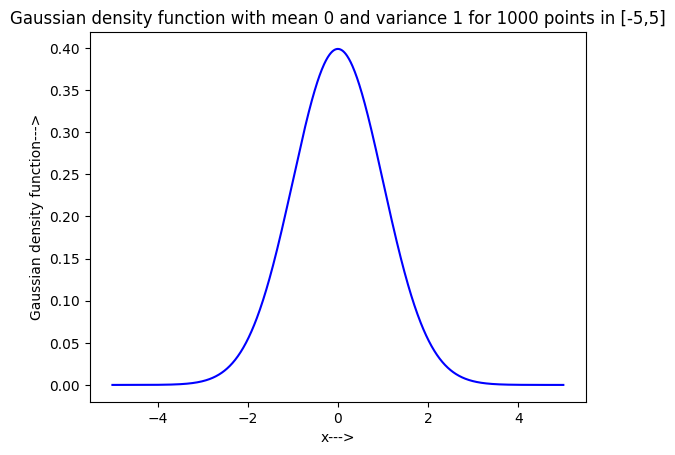

In [42]:
x = np.linspace(-5,5, 1000)
y1= gau(0,1,x)
plt.plot(x, y1, "-b", label="Gaussian density function")
plt.xlabel('x--->')
plt.ylabel('Gaussian density function--->')
plt.title("Gaussian density function with mean 0 and variance 1 for 1000 points in [-5,5]")
plt.show()

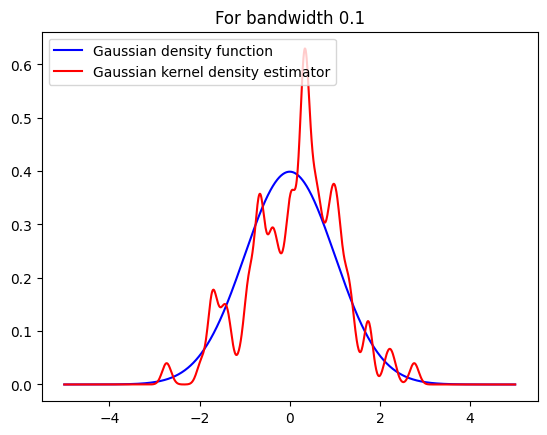

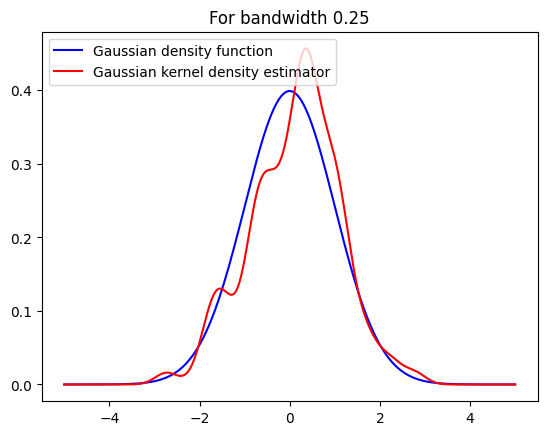

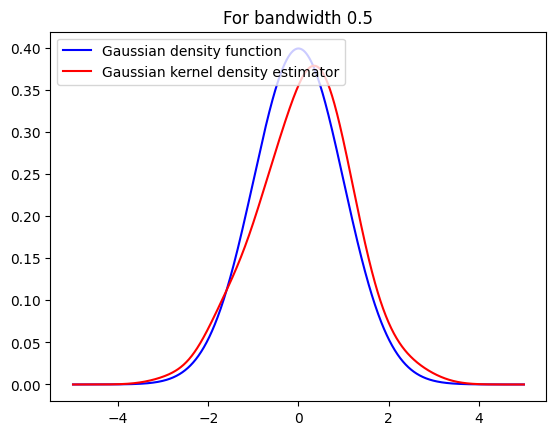

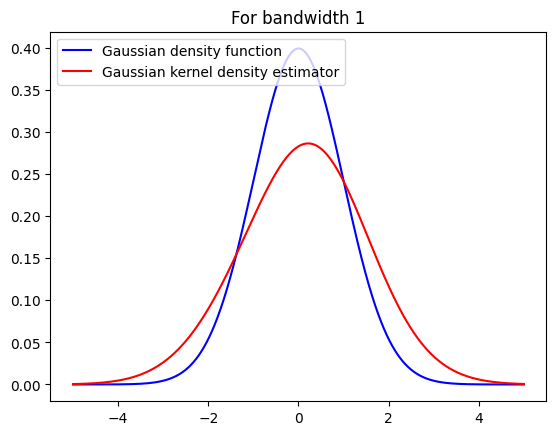

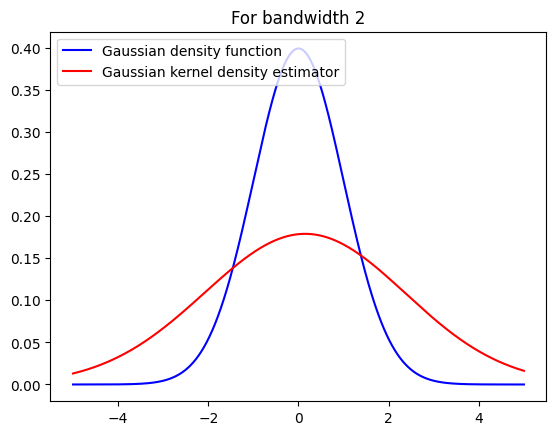

In [43]:
data = np.random.normal(0,1,100)
hat_y1 = np.zeros(1000)
H = [0.1,0.25,0.5,1,2]
for h in H:
    for k in range (1000):
        hat_y1[k] = gkde(data,h,x[k])
    
    plt.plot(x, y1,  "-b", label="Gaussian density function")
    plt.plot(x,hat_y1,  "-r", label="Gaussian kernel density estimator")
    plt.legend(loc="upper left")
    plt.title(f'For bandwidth {h}')
    plt.show()

##### From the above outputs we can see that for small binwidths h = 0.1 to 0.25, bias from the true function is less but variance(noise) is high. For binwidths h = 1 to 2, the bias increases but the variance has reduced. This is the bias-variance tradeoff. In this case, h = 0.5 is the optimal binwidth with least bias and variance.

## Solution 2.1

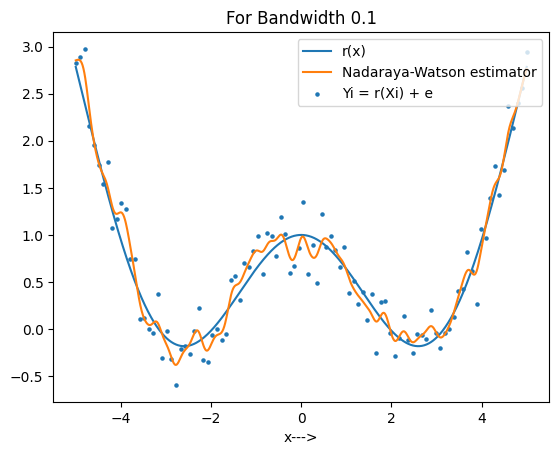

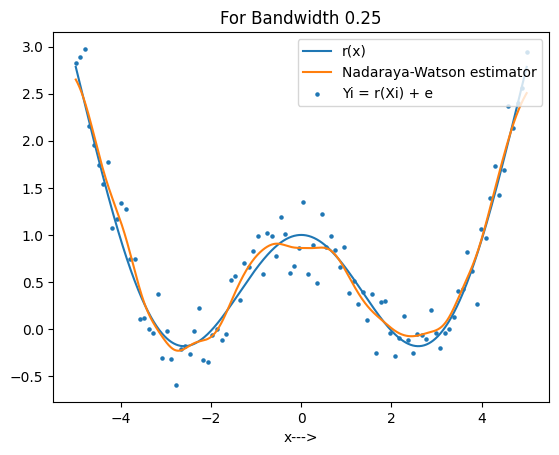

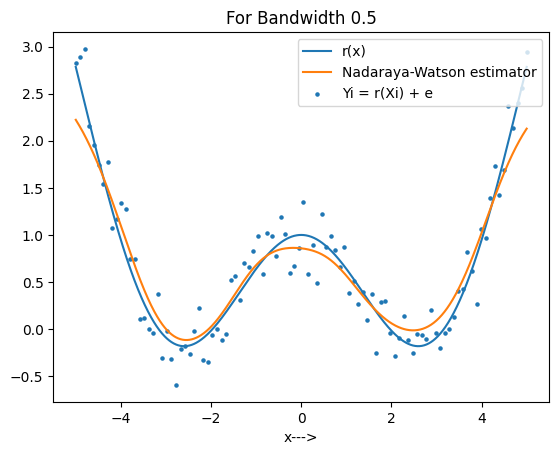

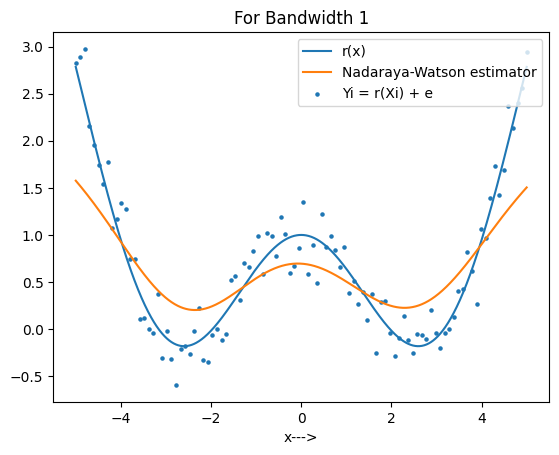

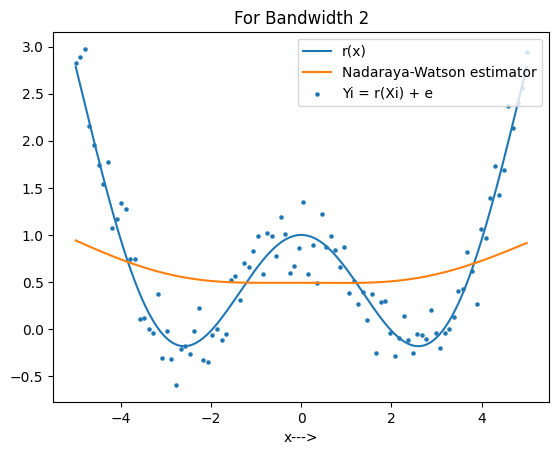

In [44]:
datax = np.linspace(-5,5,100)
datay = 0.1*datax**2+np.cos(datax)+np.random.normal(0,0.25,100)
y2 = 0.1*x**2+np.cos(x)

for h in H:
    hat_y2 = np.zeros(1000)
    for k in range (1000):
        hat_y2[k] = nw(datax,datay, h,x[k])

    plt.plot(x,y2, label='r(x)')
    plt.plot(x,hat_y2, label='Nadaraya-Watson estimator')
    plt.scatter(datax, datay,5 , label='Yi = r(Xi) + e')
    plt.legend(loc="upper right")
    plt.title(f'For Bandwidth {h}')
    plt.xlabel("x--->")
    plt.show()

##### From the above outputs we can see that for small binwidths h = 0.1 to 0.25, bias from the true function is less but the variance(noise) is high. For binwidths h = 1 to 2, the bias increases but the variance has reduced alot. This is the bias-variance tradeoff. In this case, h = 0.5 is the optimal binwidth with very less bias and variance.